# <font color ="000ff"> Transformada Rápida de Fourier</font>

Vamos iniciar relembrando que a Transformada Discreta de Fourier (DFT) é uma representação **discreta** do espectro de frequências de sinais no tempo discreto $x(n)$, cuja expressão é dada por:

$$X[k] = \sum\limits_{n=0}^{N-1}x(n)W_N^{kn},$$ sendo $W_N = e^{-j\frac{2\pi}{N}}$ e para calcular cada valor $X[k]$ são necessários
1. $N$ multiplicações complexas, e
2. $N-1$ adições complexas.


Para obter todos os coeficientes $X[k]$, $k = 0, ..., N-1$ são necessários
1. $N^2$ multiplicações complexas, e
2. $(N-1)N$ adições complexas.

Por isso dizemos que a DFT tem complexidade $O(N^2)$.

Text(0, 0.5, 'O(N^2)')

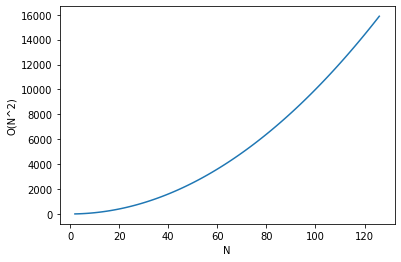

In [4]:
import numpy as np
import matplotlib.pyplot as mplib
N = 128;
n = range(2,N-1)
mplib.plot(n, np.power(n, 2))
mplib.xlabel("N")
mplib.ylabel("O(N^2)")

Em 1965 foi proposto um algoritmo rápido que reduz a complexidade do cálculo da DFT para $O(N.log_2 N)$, representada na Figura abaixo junto com a curva para $O(N^2)$.

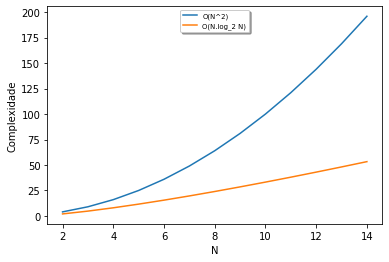

In [11]:
import numpy as np

import matplotlib.pyplot as mplib
N = 16;
n = range(2,N-1)

fig, ax = mplib.subplots()

ax.plot(n, np.power(n, 2),label='O(N^2)')
ax.plot(n, n*np.log2(n),label='O(N.log_2 N)')
mplib.xlabel("N")
mplib.ylabel("Complexidade")

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-small')


Esses algoritmos ficaram conhecidos como **Transformada Rápida de Fourier**, ou simplesmente **FFT** de *Fast Fourier Transform*.

Para entender os algoritmos da FFT consideremos o termo $W_N = e^{-j\frac{2\pi}{N}}$, sendo:

1. $|W_N| = |e^{-j\frac{2\pi}{N}}|$;
2. $\angle W_N = arctg(\frac{2\pi}{N})$.

E que pode ser interpretado como a divisão do círculo unitário em $N$ seções, cada uma com ângulo $\angle W_N$. 

Os Algoritmos da FFT exploram esse fato, aplicando as seguintes relações:

1. Simetria complexa conjugada: $W_N^{k(N-n)} = W_n^{-kn} = (W_N^{kn})^*$, ($()^*$ significa o conjugado complexo), e;

2. Periodicidade em $k$ e $n$: $W_N^{kn} = W_N^{k(N + n)} = W_N^{(k + N)n}$.

E a decomposição de uma DFT de $N$ pontos em DFTs de tamanhos menores.

Classes básicas:
    
1. FFT com decimação no tempo: $x(n)$ é sucessivamente decomposto em sequências menores
2. FFT com decimação em frequência : $X[k]$ é decomposto em sequências menores
    
Algoritmos:
    
1. Goertzel(1958): $O(N^2)$
2. **Cooley-Tukey(1965): Deu origem à decimação no tempo**
3. Sande-Tukey(1966): Deu origem à decimação em frequência


## <font color ="000ff"> FFT por Decimação no tempo </font>

Os algoritmos nessa classe são baseados na decomposição sucessiva de $x(n)$ em tamanhos menores, e para tanto se convenciona utilizar o tamanho da transformada $N = 2^l$, sendo $l$ um inteiro positivo.

Aqui vale lembra que caso $x(n)$ não tenha tamanho $N$ é possível usar o *zero-padding*, sem prejuízo para a representação espectral.

### <font color ="000ff"> Algoritmo Raiz de 2 com decimação no tempo </font>

O sinal $x(n)$ de $N$ pontos é dividido em 2 sequências de $N/2$ pontos, uma relativa aos índices **pares** e outra relativa aos índices **impares**, assim

$$X[k] = \sum\limits_{n=0}^{N-1}x(n)W_N^{kn}$$

após a divisão é escrito como

$$X[k] = \sum\limits_{n\ par}^{N/2-1}x(n)W_N^{kn} + \sum\limits_{n\ ímpar}^{N/2-1}x(n)W_N^{kn}$$

escrevendo $n = 2r$ para $n$ par, e $n = (2r + 1)$ para $n$ ímpar, temos

$X[k] = \sum\limits_{r=0}^{N/2-1}x(2r)W_N^{k2r} + \sum\limits_{r=0}^{N/2-1}x(2r+1)W_N^{k(2r+1)}$

no segundo somatório aparece o termo $W_N^k$ que não depende de $r$, logo pode se retirado d a soma, obtendo

$X[k] = \sum\limits_{r=0}^{N/2-1}x(2r)(W_N^2)^{k r} + W_N^k\sum\limits_{r=0}^{N/2-1}x(2r+1)(W_N^2)^{k r}$

Como $W_N^2 = W_{N/2}$ temos

$X[k] = \sum\limits_{r=0}^{N/2-1}x(2r)(W_{N/2})^{k r} + W_N^k\sum\limits_{r=0}^{N/2-1}x(2r+1)(W_{N/2})^{k r}$

representando as componentes pares e ímpares de $x(n)$ por

$x_e(n) = x(2n)$, $n = 0, 1, ..., N/2 -1$, e

$x_o(n) = x(2n + 1)$, $n = 0, 1, ..., N/2 -1$

Temos

$X[k] = \sum\limits_{r=0}^{N/2-1}x_e(n)(W_{N/2})^{k r} + W_N^k\sum\limits_{r=0}^{N/2-1}x_o(n)(W_{N/2})^{k r}$

Vamos denominar:

$X_e[k] = \sum\limits_{r=0}^{N/2-1}x_e(n)(W_{N/2})^{k r}$,e 

$X_o[k] = \sum\limits_{r=0}^{N/2-1}x_o(n)(W_{N/2})^{k r}$

cada uma sendo uma DFT de $N/2$ pontos

e

$X[k] = X_e[k] + W_N^kX_o[k]$

sendo $X_e[k] = X_e[k + N/2]$ e $X_o[k] = X_o[k + N/2]$

###  <center><font color=#0000ff> Para $N = 2$ </font></center>

Pelo cálculo da DFT temos:

$X[0] = \sum\limits_{n=0}^{1}x(n)W_2^{0} = x(0) + x(1)$

$X[1] = \sum\limits_{n=0}^{1}x(n)W_2^{1} = x(0) - x(1)$

Usando e FFT temos 

$X[0] = X_e[0] + W_2^0 X_o[0]$

$X[1] = X_e[1] + W_2^1 X_o[1]$

representado na figura a seguir.
![title](img/FFTN2.png)

###  <center><font color=#0000ff>Para $N = 4$ </font></center>

Lembrando que $X[k] = X_e[k] + W_N^kX_o[k]$

sendo $X_e[k] = X_e[k + N/2]$ e $X_o[k] = X_o[k + N/2]$

Usando e FFT temos 

$X[0] = X_e[0] + W_4^0 X_o[0] $ 

$X[1] = X_e[1] + W_4^1 X_o[1]$ 

$X[2] = X_e[2] + W_4^2 X_o[2] = X_e[0] + W_4^2 X_o[0]$      <font color = "0000ff"> Devido a simetria X[k + N/2] = X[k]$</font>

$X[3] = X_e[3] + W_4^3 X_o[3] = X_e[1] + W_4^2 X_o[1]$       <font color = "0000ff"> Devido a simetria X[k + N/2] = X[k]$</font>

![title](img/TrelicaFFTN4.png)

Observando as duas estruturas acima, vemos que para uma FFT de tamanho $N$, são necessários $\log_2(N)$ estágios, e em cada estágio, a partir dos valores do ainsl, são realizadas DFTs de tamanhos $2, 4, 8, ..., N$.

Para o primeiro estágio, FFT de tamanho $N_1 = 2$, para calcular $X_e[k]$ $k = 0, 1$ usa-se as posições de entrada 0 (quem contém $x(0)$) e 1 (que contém $x(2)$), já $X_o[k]$ usa as posições 2 (que contém $x(1)$) e 3 (que contém $x(3)$), houve um deslocamento de $N_1/2$ na posições de entrada.

No segundo estágio, FFTs de tamanho $N_2 = 4$ e nesse caso já o resultado da FFT, $X[k],\ k = 0,1 2,3$ para cada $k$, envolve as **posições anteriores** $k$ e $(k+ N_2/2) mod\ N_2$

Pelo cálculo da DFT temos:

$X[0] = \sum\limits_{n=0}^{3}x(n)W_4^{0} = x(0) + x(1) + x(2) + x(3) = x(0) + x(2) + x(1) + x(3)$

$X[1] = \sum\limits_{n=0}^{3}x(n)W_4^{n} = x(0) + x(1)W_4^{1}  + x(2)W_4^{2} + x(3)W_4^{3} =  
x(0) - x(2) -j[x(1) - x(3)]$

$X[2] = \sum\limits_{n=0}^{3}x(n)W_4^{2n} = x(0) + x(1)W_4^{2} + x(2W_4^{4}) + x(3)W_4^{6} = x(0) + x(2) -[x(1) + x(3)]$

$X[3] = \sum\limits_{n=0}^{3}x(n)W_4^{3n} = x(0) + x(1)W_4^{3} + x(2)W_4^{6} + x(3)W_4^{9} = x(0) - x(2) + j[x(1) - x(3)]$

$X_e[k] = \sum\limits_{r=0}^{1}x_e(n)(W_{2})^{k r}$, e $X_o[k] = \sum\limits_{r=0}^{1}x_o(n)(W_{2})^{k r}$

e

$X_e[0] = x(0) + x(2)$, e $X_e[1] = x(0) - x(2)$

$X_o[0] = x(1) + x(3)$, e $X_e[1] = x(1) - jx(3)$

Veja na Figura acima que na entrada do primeiro estágio, os índices de $x(n)$ aparecem numa sequência obtida pelo reverso dos bits de 0 a 4, ou seja, considerando $X_0[k]$ como primeiro estágio temos
$$X_0[00_2] = x(00_2)$$
$$X_0[01_2] = x(10_2)$$
$$X_0[10_2] = x(01_2)$$
$$X_0[11_2] = x(11_2)$$
Essa regra serve para qualquer implementação de FFT pelo método de decimação no tempo.

###  <center><font color=#0000ff>  N = 8 </font></center>

Para $N = 8$ vamos usar a borboleta otimizada mostrada na Figura abaixo (Fig. 9.12, pp.431 Livro Texto)

Sendo 

$X_m[p] = X_{m-1}[p] + W_N^rX_{m-1}[q]$

$X_m[q] = X_{m-1}[p] - W_N^r X_{m-1}[q]$

Precisamos avaliar como variam $m$, $p$, $q$ e $r$. Inicialmente, vamos atribuir os valore do sinal $x(n)$ ao estágio inicial da treliça, usando a sequência obtida pela inversão da ordem dos bits dos índices de $x(n)$, ou seja:

$X_0[0] = x(0)$

$X_0[1] = x(4)$

$X_0[2] = x(2)$

$X_0[3] = x(6)$

$X_0[4] = x(1)$

$X_0[5] = x(5)$

$X_0[6] = x(3)$

$X_0[7] = x(7)$

e representara a treliça, que tem $log_2(N)$ estágios, no para $N = 8$ teremos 3 estágios, qu estão representados a seguir.

![title](img/FFTN8peq.png)

Repetindo a treliça apresentando somente os valore de $p$ e $q$ em cada estágio.

**Questão:** Como implementar um código para um $N$ qualquer?

## Testando a implementação

Para avaliar a implementação da FFT podemos usar sinais conhecidos, como uma constante, um impulso ou uma senóide para os quais conhecemos a transformada. Porém alguns cuidados deverm ser tomados, por exemplo, inicialmente deve-se observar que a saída da FFT é um conjunto de números complexos, logo devemos analisar o módulo e a fase da resposta. 

Ao aplicar um sinal constante obteremos na saída um impulso, com $X(k) = N.\delta(k)$  e fase zero.

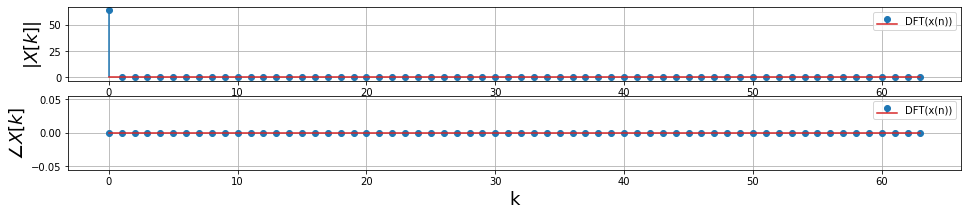

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp

L = 64 # Quantidade de pontos no sinal = Tamanho da FFT

fig,ax=plt.subplots(2)
fig.set_size_inches((16,3))

n = np.arange(0,L)

xn = np.ones(L)
Xomega = scp.fft(xn, L)


ax[0].stem(abs(Xomega),label='DFT(x(n))',use_line_collection=True,)
ax[0].set_xlabel('k',fontsize=18)
ax[0].set_ylabel(r'$|X[k]|$',fontsize=18)
#ax[0].set_title('DFT Sinal Janelado',fontsize=18)
ax[0].grid()
ax[0].legend(loc=0);

ax[1].stem(np.angle(Xomega),label='DFT(x(n))',use_line_collection=True,)
ax[1].set_xlabel('k',fontsize=18)
ax[1].set_ylabel(r'$\angle X[k]$',fontsize=18)
#ax[1].set_title('DFT Sinal Janelado',fontsize=18)
ax[1].grid()
ax[1].legend(loc=0);

Um segundo teste é usar o teorema da dualidade da transformada de Fourier, e aplicar um impulso na entrada e observar que na saída obtem-se uma constante.

Neste momento deve-se observar o valor do impulso, pois em algumas implementações, ser for colocar $x(n) = \delta(n)$, o valor da FFT pode ser muito pequeno, aparecendo nulo. Isso se deve ao fato que a existe um parâmetro $\frac{1}{N}$ na relação da transformada inversa, ou seja, para garantir que aplicar um impulso na entrada será obtido uma constante na FFT, deve-se aplicar $x(n) = N\delta(n)$.

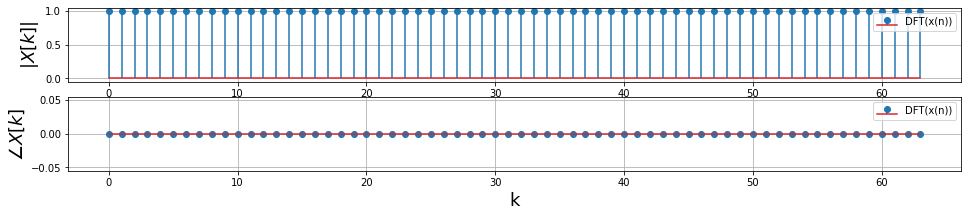

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp

L = 64 # Quantidade de pontos no sinal = Tamanho da FFT
N = 64 # Tamanho da DFT

fig,ax=plt.subplots(2)
fig.set_size_inches((16,3))

n = np.arange(0,L)

#Sinal de entrada
xn = np.zeros(L)
xn[0] = 1 # apenas a primeira componente não zero, para emular um impulso
Xomega = scp.fft(xn, L)


ax[0].stem(abs(Xomega),label='DFT(x(n))',use_line_collection=True,)
ax[0].set_xlabel('k',fontsize=18)
ax[0].set_ylabel(r'$|X[k]|$',fontsize=18)
#ax[0].set_title('DFT Sinal Janelado',fontsize=18)
ax[0].grid()
ax[0].legend(loc=0);

ax[1].stem(np.angle(Xomega),label='DFT(x(n))',use_line_collection=True,)
ax[1].set_xlabel('k',fontsize=18)
ax[1].set_ylabel(r'$\angle X[k]$',fontsize=18)
#ax[1].set_title('DFT Sinal Janelado',fontsize=18)
ax[1].grid()
ax[1].legend(loc=0);

Outro ponto a se testar é a mudança no sinal de entrada para verificar se os índices foram corretamente ajustados na entrada da FFT. Por exemplo, considerando a propriededa do deslocamenteo no tempo da Transformada de Fourier
$$ x(n) \leftrightarrow X(j\omega)$$
$$ x(n - n_0) \leftrightarrow e^{-j\omega n_0}X(j\omega),$$
se aplicarmos um sinal $x(n) = \delta(n -1)$, temos um impulso deslocado de uma posição, cujo módulo da transformada continua unitário, porém deve aparecer uma componente de fase relativo ao deslocamento com o valor
$$tg^{-1}(\frac{2\pi k}{N}).$$

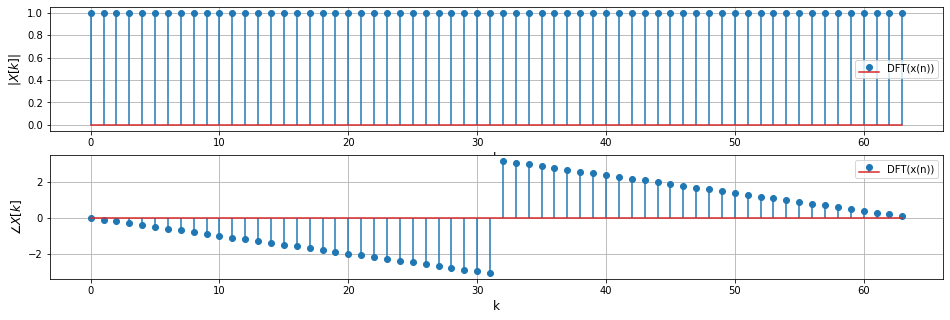

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp

L = 64 # Quantidade de pontos no sinal = Tamanho da FFT
N = 64 # Tamanho da DFT

fig,ax=plt.subplots(2)
fig.set_size_inches((16,5))

n = np.arange(0,L)

#Sinal de entrada
xn = np.zeros(L)
xn[1] = 1 # Emulaçao de um impulso deslocado
Xomega = scp.fft(xn, L)


ax[0].stem(abs(Xomega),label='DFT(x(n))',use_line_collection=True,)
ax[0].set_xlabel('k',fontsize=12)
ax[0].set_ylabel(r'$|X[k]|$',fontsize=12)
ax[0].grid()
ax[0].legend(loc=0);

ax[1].stem(np.angle(Xomega),label='DFT(x(n))',use_line_collection=True,)
ax[1].set_xlabel('k',fontsize=12)
ax[1].set_ylabel(r'$\angle X[k]$',fontsize=12)
ax[1].grid()
ax[1].legend(loc=0);